The Goal of thus problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train

# Imports

In [3]:
import pandas as pd
import scipy.stats as stats
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from dtreeviz.trees import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


# EDA

In [4]:
TrainingSurvey = pd.read_csv('Surveydata_train.csv')
TrainingSurvey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [13]:
TrainingTravel = pd.read_csv('Traveldata_train.csv')
TrainingTravel.head()

ValueError: No objects to concatenate

In [4]:
raw_df=TrainingTravel.join(TrainingSurvey.set_index('ID'), on='ID')

In [5]:
TrainingTravel.shape 


(94379, 9)

In [6]:
TrainingSurvey.shape

(94379, 17)

In [7]:
TrainingTravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [8]:
TrainingSurvey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [9]:
raw_df.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222,0.546658
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409,0.497821
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000,1.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000,1.000000


In [10]:
raw_df.duplicated().sum()

0

In [11]:
raw_df.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

### Univariable analysis

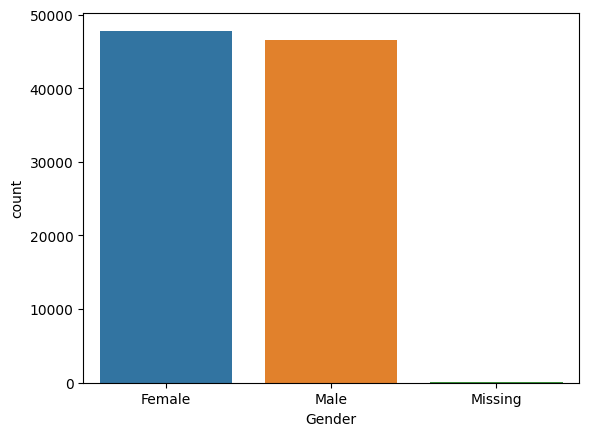

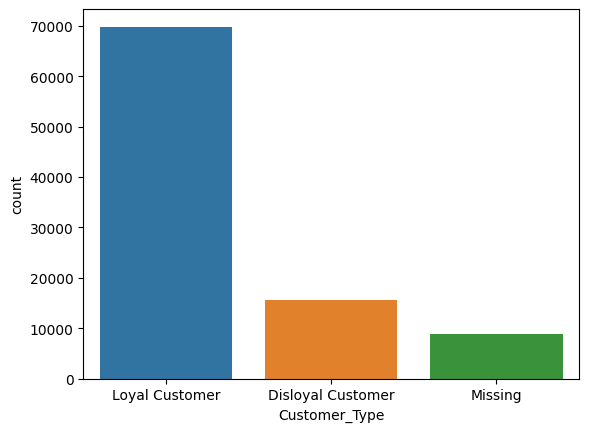

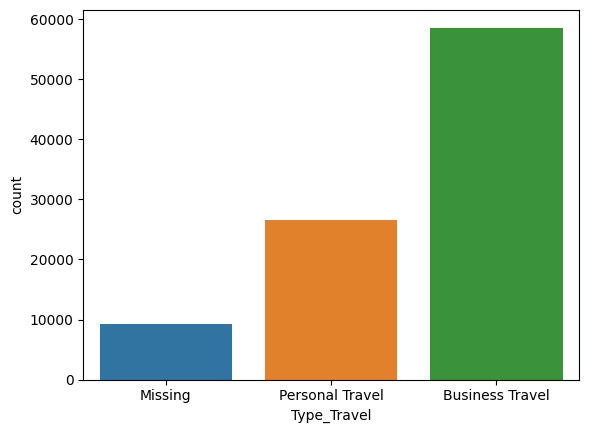

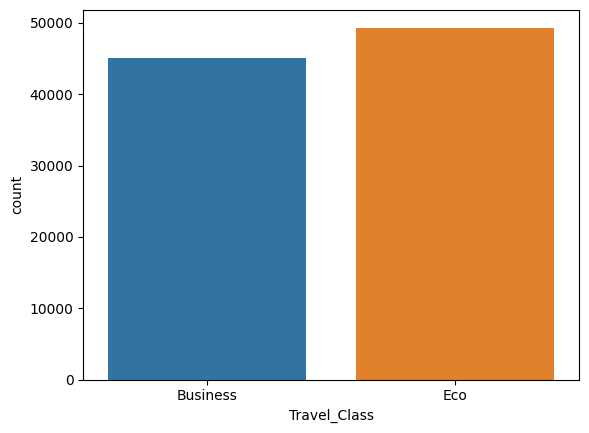

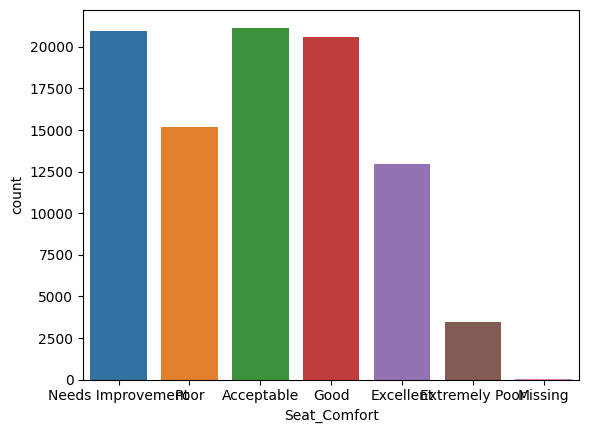

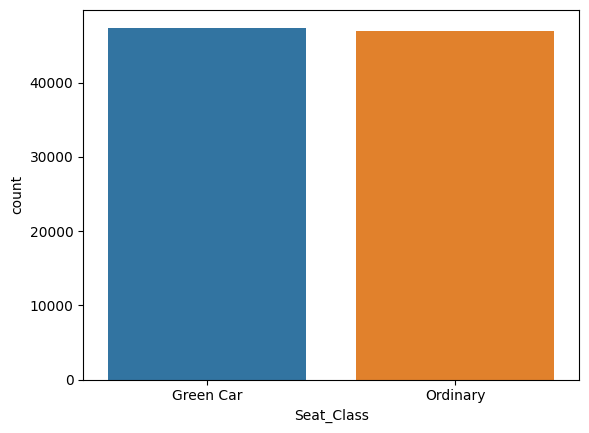

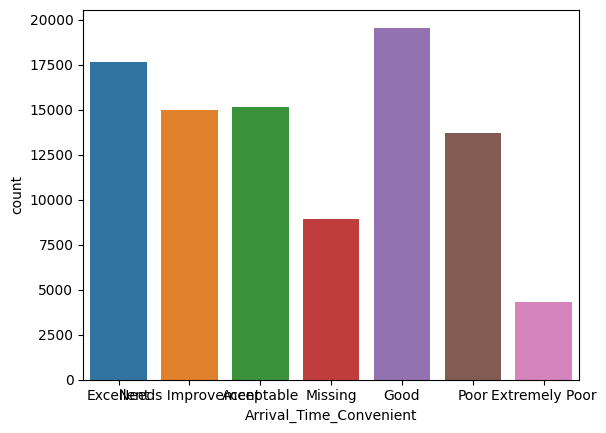

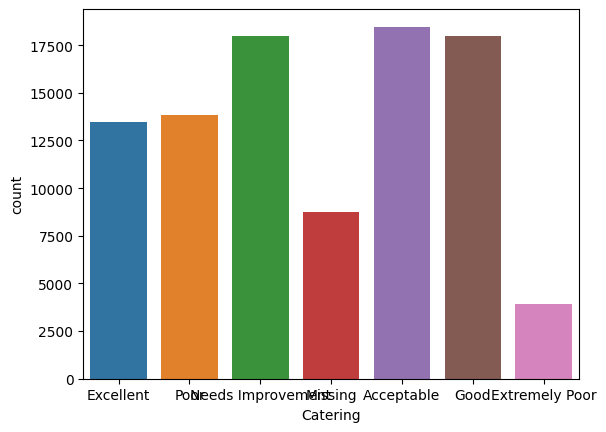

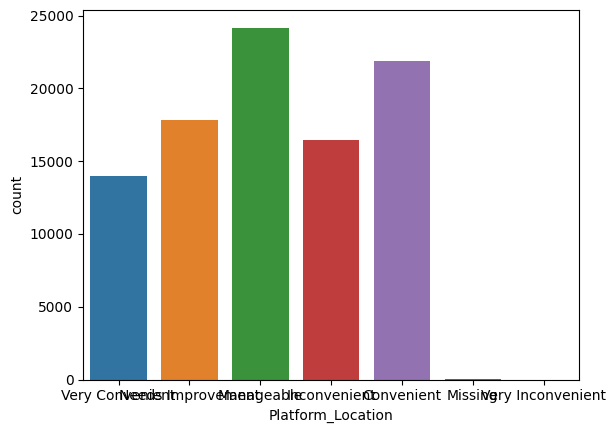

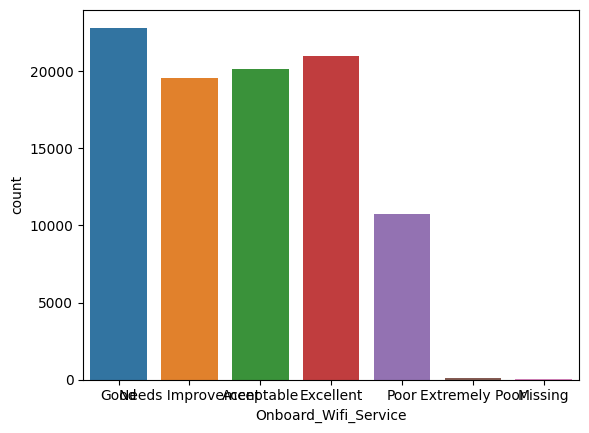

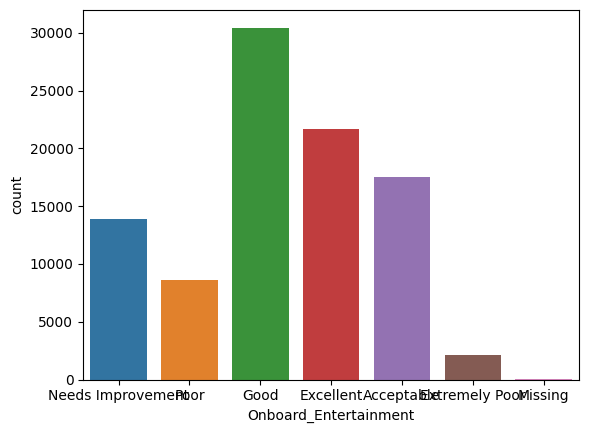

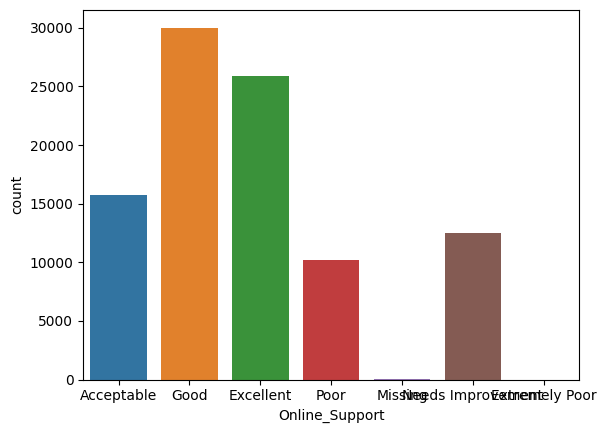

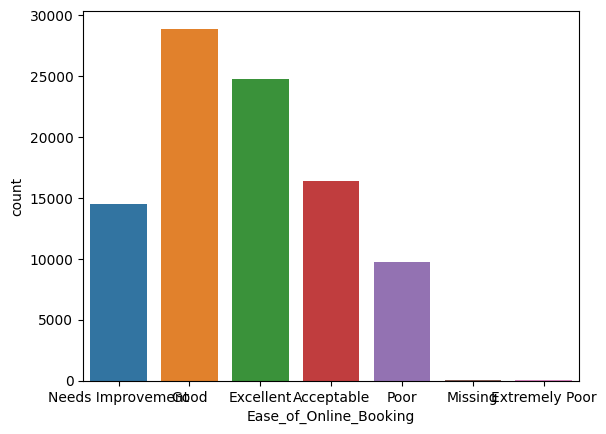

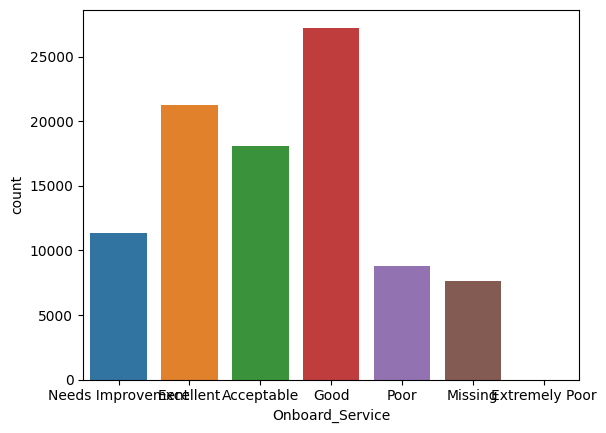

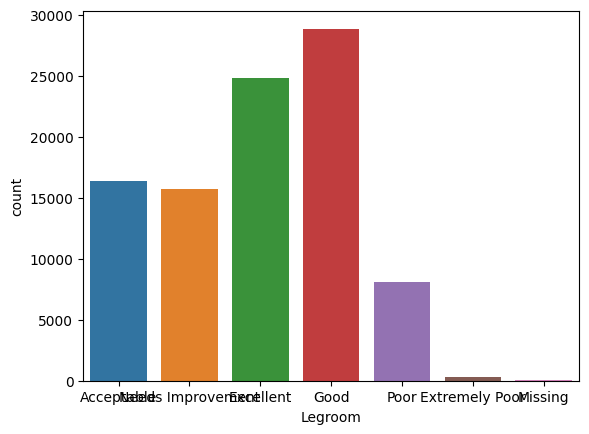

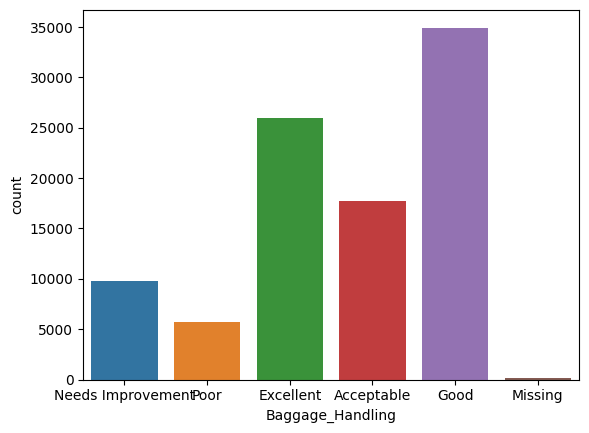

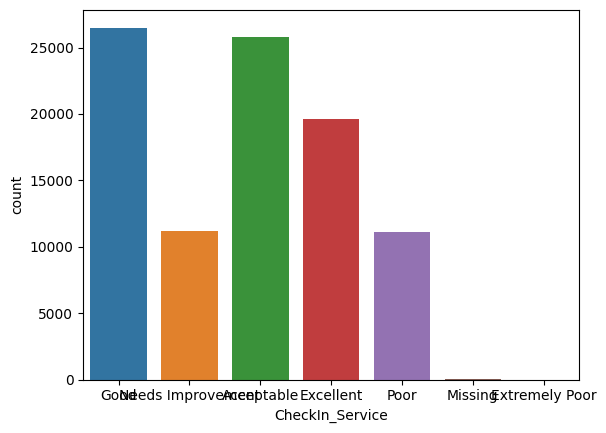

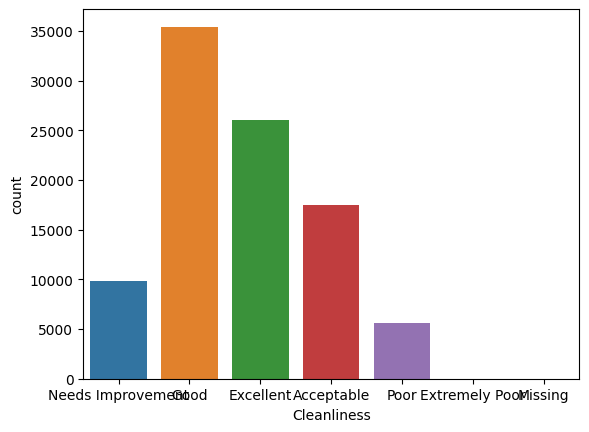

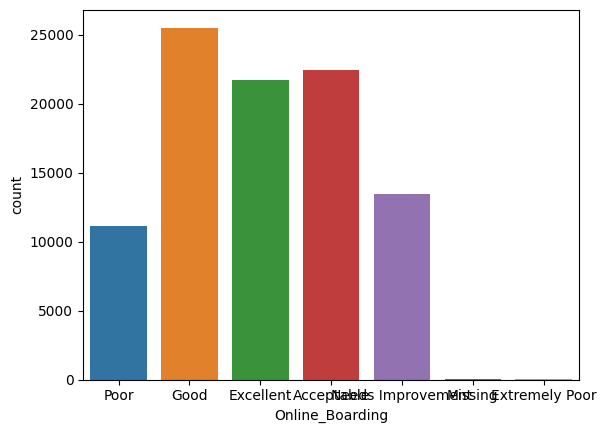

In [12]:
for col in raw_df.select_dtypes(include=['object']).columns:
    sns.countplot(x=raw_df[col].fillna('Missing'))
    plt.show()

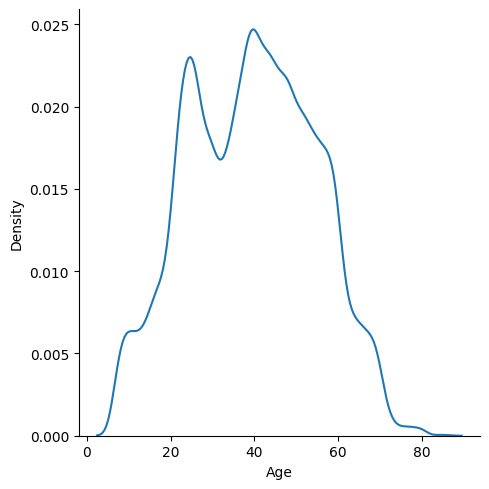

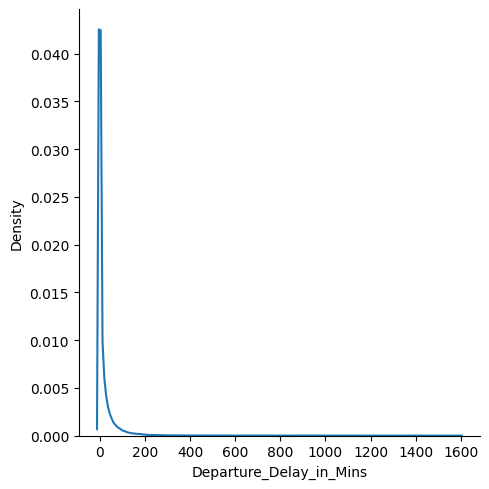

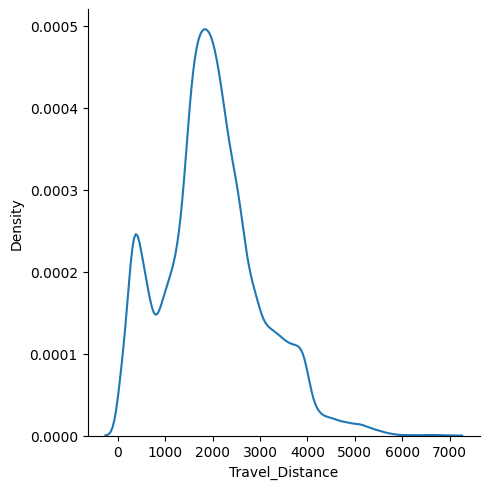

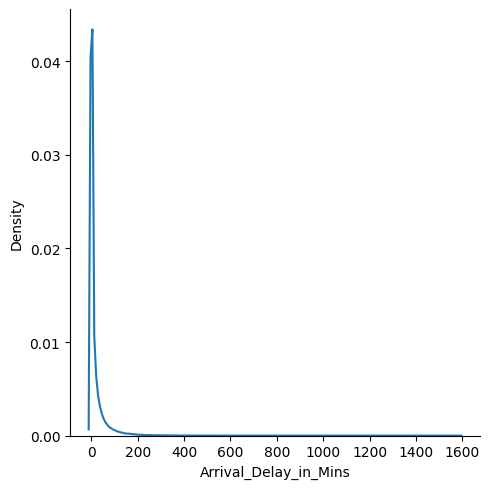

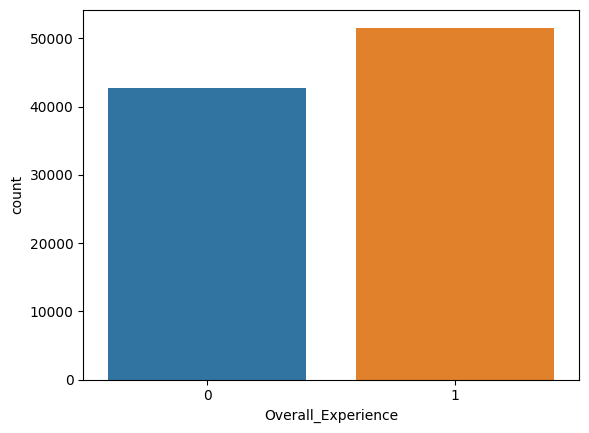

In [13]:
sns.displot(x=raw_df['Age'],kind="kde")
plt.show()
sns.displot(x=raw_df['Departure_Delay_in_Mins'],kind="kde")
plt.show()
sns.displot(x=raw_df['Travel_Distance'],kind="kde")
plt.show()
sns.displot(x=raw_df['Arrival_Delay_in_Mins'],kind="kde")
plt.show()
sns.countplot(x=raw_df['Overall_Experience'])
plt.show()

## Multivariable Analysis

In [14]:
#replace categorie classes with Ordinal/Binary
standard_6tier_ratings = {'Extremely Poor':0,'Poor':1,'Needs Improvement':2,  'Acceptable':3, 'Good':4, 'Excellent':5}
print(raw_df.columns)
raw_df=raw_df.replace({'Gender': {'Male': 0, 'Female': 1},
                'Customer_Type': {'Loyal Customer': 1, 'Disloyal Customer': 0},
                'Type_Travel' : {'Personal Travel':0, 'Business Travel':1},
                'Travel_Class':  {'Business':0, 'Eco':1},
                'Seat_Comfort': standard_6tier_ratings,  
                'Seat_Class' :{'Green Car':0, 'Ordinary':1},
                'Arrival_Time_Convenient': standard_6tier_ratings,
                'Catering' :standard_6tier_ratings,
                'Platform_Location' :{'Very Inconvenient':0,'Inconvenient':1,'Needs Improvement':2,'Manageable':3,'Convenient':4,'Very Convenient':5},
                'Onboard_Wifi_Service': standard_6tier_ratings,
                'Onboard_Entertainment': standard_6tier_ratings,
                'Online_Support' :standard_6tier_ratings,
                'Ease_of_Online_Booking':standard_6tier_ratings, 
                'Onboard_Service':standard_6tier_ratings,
                'Legroom': standard_6tier_ratings,
                'Baggage_Handling': {'Needs Improvement':1, 'Poor':0, 'Excellent':4, 'Acceptable':2, 'Good':3 },
                'CheckIn_Service' :standard_6tier_ratings,
                'Cleanliness' : standard_6tier_ratings,
                'Online_Boarding': standard_6tier_ratings
                }
    )

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')


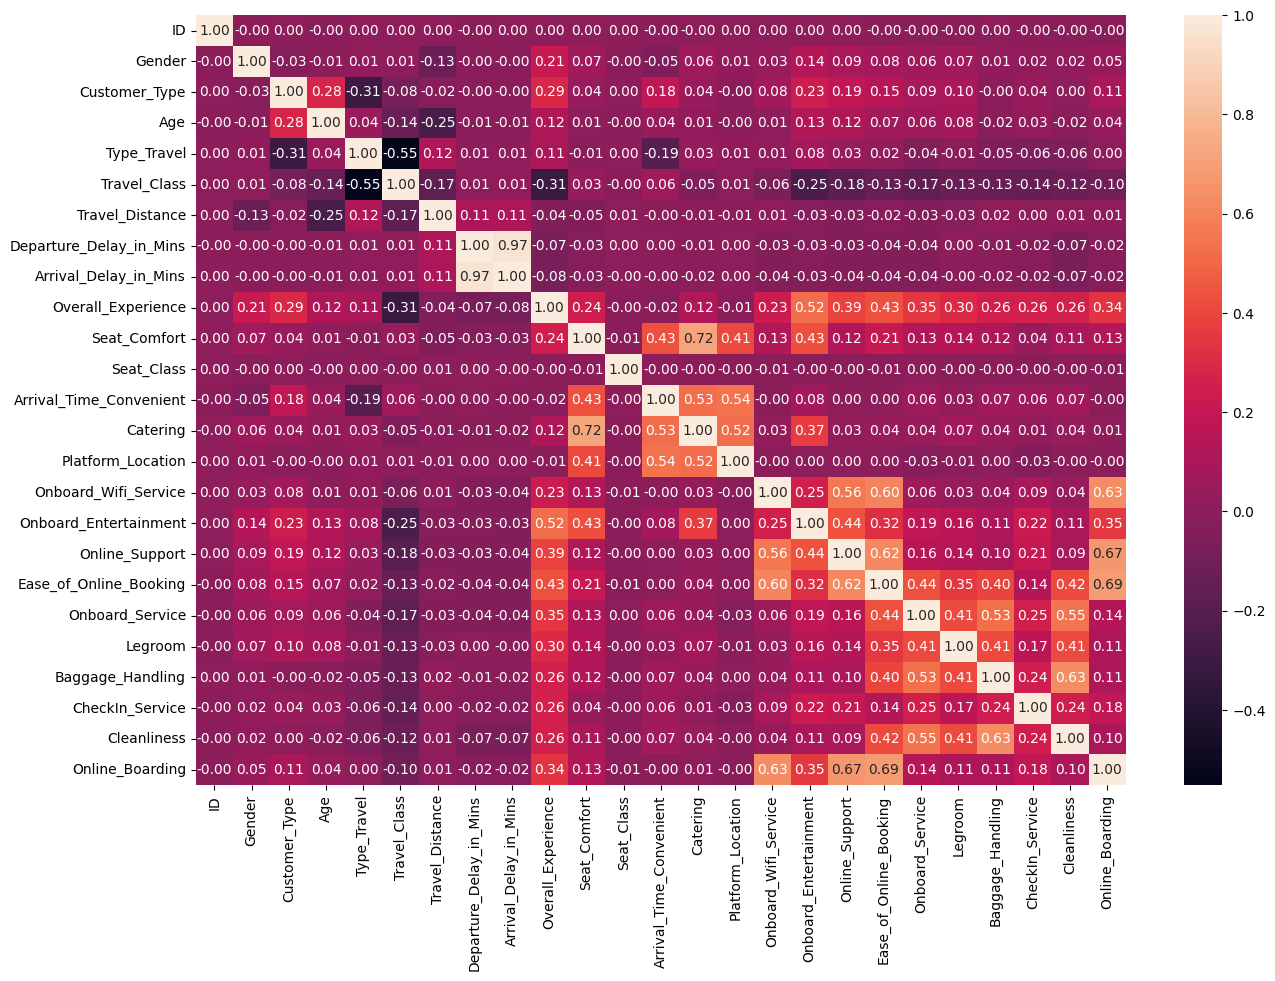

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(raw_df.corr(), annot=True, fmt='0.2f')
plt.show()

The heat map shows that there's a strong correlation between arrival_delay_in_mins and departure delay in mins. Additionally, there's a slightly strong correlation between seat comfort and catering. 

# Prep Model Build

## Filling Null Values

In [16]:
raw_df.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

We are replacing null values with mean across the board this includes filling in binary variables such as Gender as 0.507 which while reduces biast 

In [17]:
#replacing null data for numeric with the Avg and categorical with mode
print(raw_df.mean())
column_means = raw_df.mean()
dfNullReplaced = raw_df.fillna(column_means)

ID                         9.884719e+07
Gender                     5.070412e-01
Customer_Type              8.173316e-01
Age                        3.941965e+01
Type_Travel                6.883727e-01
Travel_Class               5.228070e-01
Travel_Distance            1.978888e+03
Departure_Delay_in_Mins    1.464709e+01
Arrival_Delay_in_Mins      1.500522e+01
Overall_Experience         5.466576e-01
Seat_Comfort               2.839182e+00
Seat_Class                 4.973988e-01
Arrival_Time_Convenient    2.994991e+00
Catering                   2.853511e+00
Platform_Location          2.990864e+00
Onboard_Wifi_Service       3.248227e+00
Onboard_Entertainment      3.382510e+00
Online_Support             3.519250e+00
Ease_of_Online_Booking     3.470108e+00
Onboard_Service            3.470799e+00
Legroom                    3.482994e+00
Baggage_Handling           2.696786e+00
CheckIn_Service            3.342400e+00
Cleanliness                3.704078e+00
Online_Boarding            3.351901e+00


In [18]:
dfNullReplaced.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

## Pre Data Transformation

Because of the hevey skew on these two variables measures are taken to bin them for better normalization and outlier detection

c:\Users\User\Documents\GitHub\train experience\venv\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


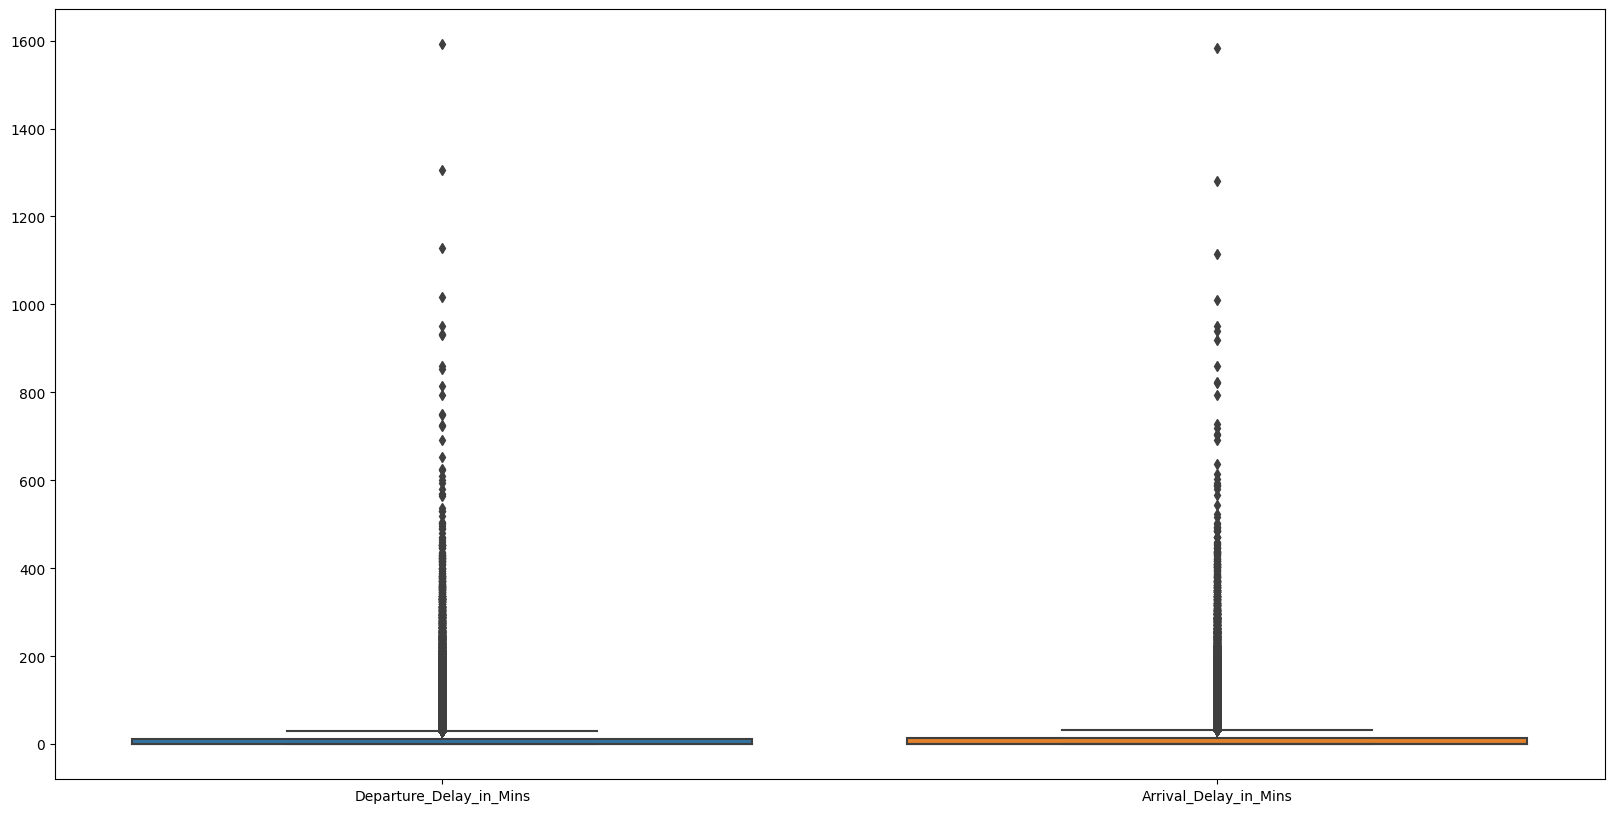

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = dfNullReplaced[['Departure_Delay_in_Mins','Arrival_Delay_in_Mins']])
plt.show()

<Figure size 2000x1000 with 0 Axes>

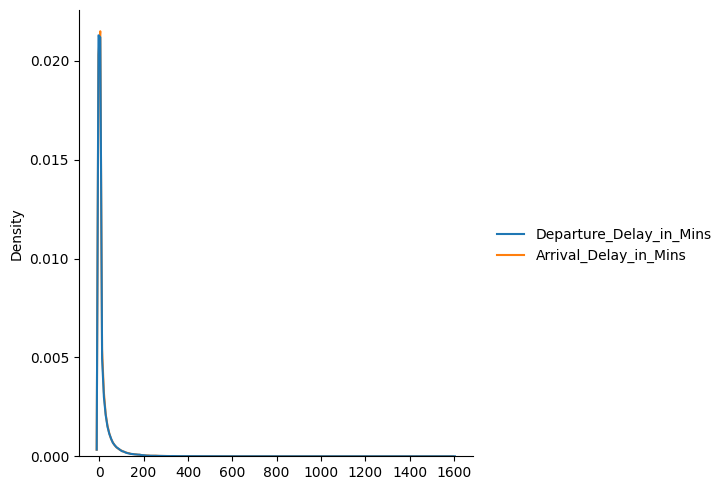

In [20]:
plt.figure(figsize=(20, 10))
sns.displot(data = dfNullReplaced[['Departure_Delay_in_Mins','Arrival_Delay_in_Mins']],kind = 'kde')
plt.show()

<Figure size 2000x1000 with 0 Axes>

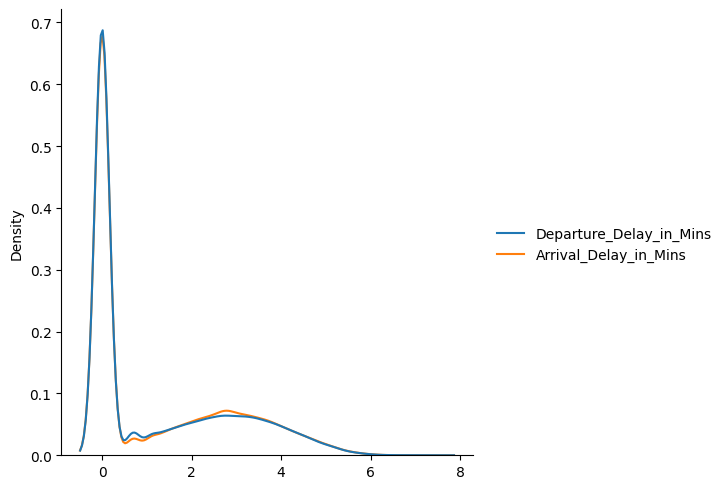

In [21]:
transformed = np.log(dfNullReplaced[['Departure_Delay_in_Mins','Arrival_Delay_in_Mins']]+1)

plt.figure(figsize=(20, 10))
sns.displot(data = transformed,kind = 'kde')
plt.show()

A Step Could be taken to pull out outliers at extreme 6 point

<Figure size 2000x1000 with 0 Axes>

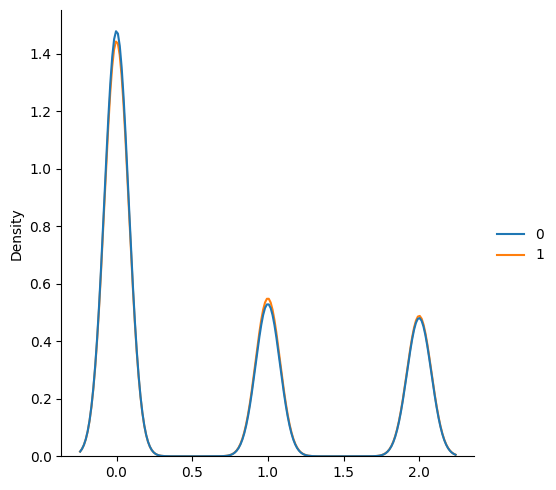

In [22]:
binned = pd.DataFrame(np.digitize(transformed, bins=[1,3]))#Binned into No Delay, Delay, Very Delayed

plt.figure(figsize=(20, 10))
sns.displot(data = binned,kind = 'kde')
plt.show()

In [23]:
dfNullReplaced[['Departure_Delay_in_Mins','Arrival_Delay_in_Mins']] = binned

## Data Normalization

applying normalization to df except have Overall_Experience remain Binary

In [24]:
dfNullReplaced.columns

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [25]:
#Note that there
scaler = StandardScaler()
transformed_data = scaler.fit_transform(dfNullReplaced)

In [26]:
transformed_df = pd.DataFrame(transformed_data, columns = dfNullReplaced.columns)
transformed_df['Overall_Experience']=dfNullReplaced['Overall_Experience']

## Outlier Detection

PyOD python outlier detection package

https://towardsdatascience.com/top-3-python-packages-for-outlier-detection-2dc004be9014

Normalize and then remove outliers?

It depends on what you exactly need for your use-case, but if you remove outliers after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)

So, if you are about to use a procedure where scaled data in needed, you should definitely remove your outliers first, then standardize. Otherwise you may end up with different variables having different standard deviations (which is an issue, for example, in PCA analysis)

I our case this should not be a problem

In [27]:
transformed_df.describe()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,94379.000000,...,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04
mean,-9.636622e-17,-2.159206e-16,2.763000e-16,-1.766212e-16,-1.428554e-17,-1.144349e-17,-4.042864e-17,-1.942382e-17,-3.658905e-17,0.546658,...,1.849027e-16,2.710300e-18,1.367949e-16,4.531471e-16,-5.095364e-16,-6.800217e-16,-2.746437e-16,1.505722e-18,1.557670e-16,1.724052e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.497821,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.732032e+00,-1.014597e+00,-2.223335e+00,-2.145021e+00,-1.564702e+00,-1.046703e+00,-1.876431e+00,-7.568076e-01,-7.746054e-01,0.000000,...,-2.462077e+00,-2.512908e+00,-2.691513e+00,-2.659017e+00,-2.853310e+00,-2.696573e+00,-2.333823e+00,-2.653149e+00,-3.215499e+00,-2.582332e+00
25%,-8.660162e-01,-1.014597e+00,3.020069e-16,-8.217363e-01,-1.564702e+00,-1.046703e+00,-6.030301e-01,-7.568076e-01,-7.746054e-01,0.000000,...,-9.461259e-01,-1.027083e+00,-3.971207e-01,-1.126490e+00,-3.870393e-01,-1.148150e+00,-6.030048e-01,-2.717921e-01,-6.112084e-01,-1.041516e+00
50%,0.000000e+00,9.864178e-01,4.969014e-01,3.839862e-02,7.083431e-01,9.553805e-01,-5.436829e-02,-7.568076e-01,-7.746054e-01,1.000000,...,-1.881503e-01,4.587410e-01,3.676767e-01,4.060369e-01,4.350510e-01,4.002720e-01,2.624044e-01,-2.717921e-01,2.568886e-01,4.993004e-01
75%,8.660162e-01,9.864178e-01,4.969014e-01,7.662050e-01,7.083431e-01,9.553805e-01,5.439066e-01,5.065999e-01,4.847655e-01,1.000000,...,5.698254e-01,4.587410e-01,1.132474e+00,1.172300e+00,4.350510e-01,1.174483e+00,1.127813e+00,5.219934e-01,1.124986e+00,4.993004e-01
max,1.732032e+00,9.864178e-01,4.969014e-01,3.015789e+00,7.083431e-01,9.553805e-01,4.836894e+00,1.770008e+00,1.744136e+00,1.000000,...,1.327801e+00,1.201653e+00,1.132474e+00,1.172300e+00,1.257141e+00,1.174483e+00,1.127813e+00,1.315779e+00,1.124986e+00,1.269709e+00


c:\Users\User\Documents\GitHub\train experience\venv\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


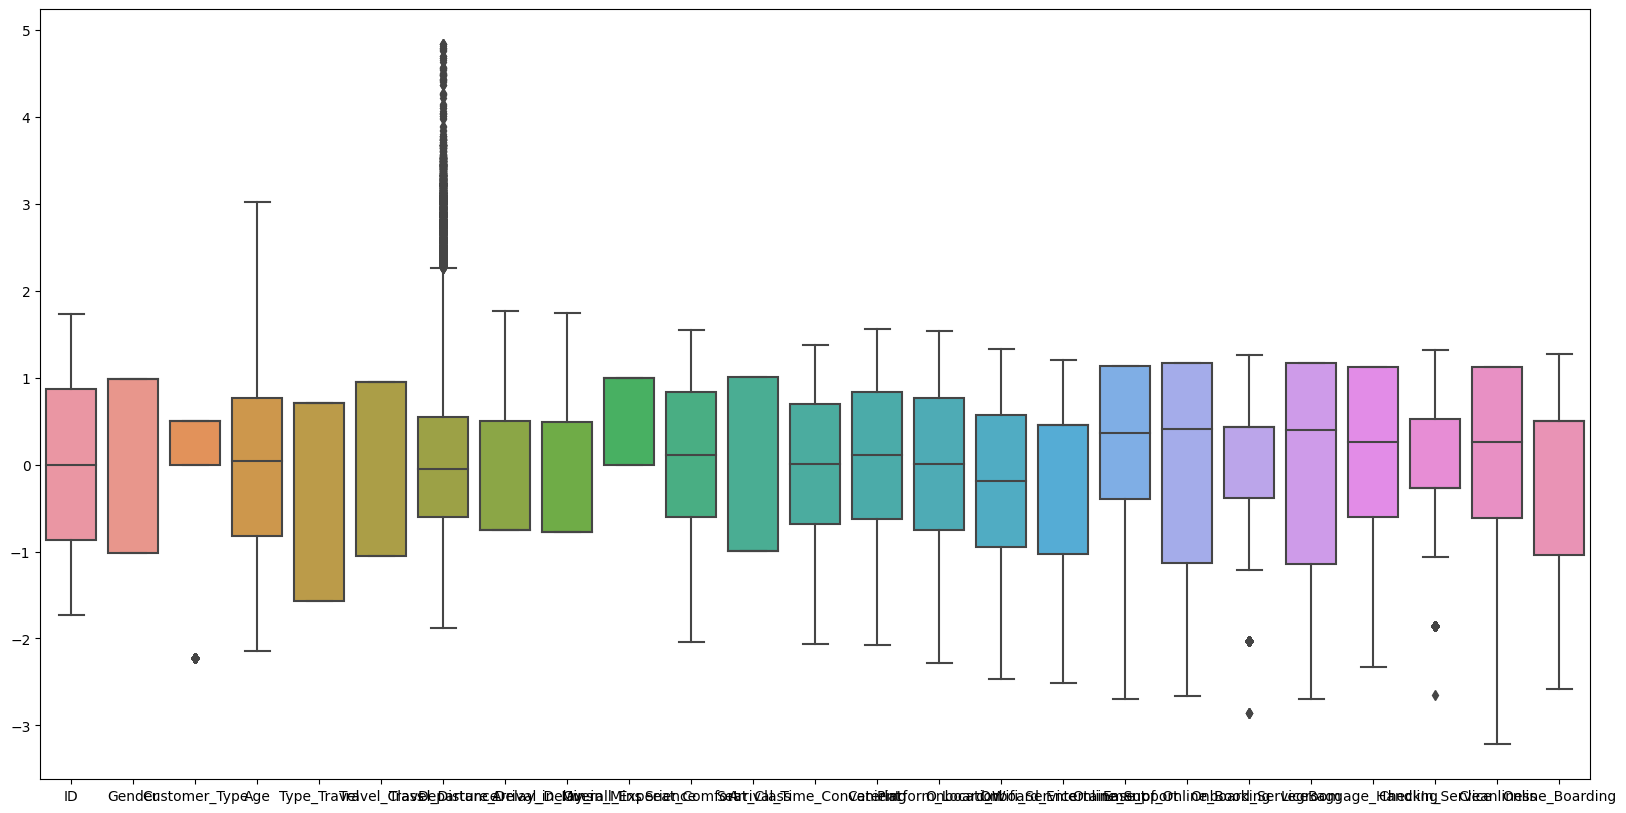

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = transformed_df)
plt.show()

In [29]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(transformed_df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = transformed_df[(z<3).all(axis=1)]

In [30]:
data_clean.describe()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,93739.000000,93739.000000,9.373900e+04,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000,...,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000,93739.000000
mean,0.000785,-0.000075,-2.634206e-03,0.003105,-0.003600,0.006228,-0.022418,-0.002785,-0.002692,0.546101,...,-0.001408,-0.000953,-0.000299,-0.000083,0.000902,0.001066,0.000101,0.000035,0.000997,-0.001141
std,0.999804,1.000004,1.002210e+00,0.999474,1.001624,0.999702,0.964467,0.998503,0.998614,0.497873,...,1.000240,1.000535,1.000473,1.000393,0.999783,0.999846,1.000177,0.999867,0.999370,1.000325
min,-1.732032,-1.014597,-2.223335e+00,-2.145021,-1.564702,-1.046703,-1.876431,-0.756808,-0.774605,0.000000,...,-2.462077,-2.512908,-2.691513,-2.659017,-2.031220,-2.696573,-2.333823,-2.653149,-2.347402,-2.582332
25%,-0.864585,-1.014597,3.020069e-16,-0.821736,-1.564702,-1.046703,-0.608867,-0.756808,-0.774605,0.000000,...,-0.946126,-1.027083,-0.397121,-1.126490,-0.387039,-1.148150,-0.603005,-0.271792,-0.611208,-1.041516
50%,0.000551,0.986418,4.969014e-01,0.038399,0.708343,0.955380,-0.061178,-0.756808,-0.774605,1.000000,...,-0.188150,0.458741,0.367677,0.406037,0.435051,0.400272,0.262404,-0.271792,0.256889,0.499300
75%,0.866493,0.986418,4.969014e-01,0.766205,0.708343,0.955380,0.527369,0.506600,0.484766,1.000000,...,0.569825,0.458741,1.132474,1.172300,0.435051,1.174483,1.127813,0.521993,1.124986,0.499300
max,1.732032,0.986418,4.969014e-01,2.684967,0.708343,0.955380,2.999266,1.770008,1.744136,1.000000,...,1.327801,1.201653,1.132474,1.172300,1.257141,1.174483,1.127813,1.315779,1.124986,1.269709


In [31]:
data_clean.std()

ID                         0.999804
Gender                     1.000004
Customer_Type              1.002210
Age                        0.999474
Type_Travel                1.001624
Travel_Class               0.999702
Travel_Distance            0.964467
Departure_Delay_in_Mins    0.998503
Arrival_Delay_in_Mins      0.998614
Overall_Experience         0.497873
Seat_Comfort               1.000441
Seat_Class                 1.000007
Arrival_Time_Convenient    1.000359
Catering                   1.000023
Platform_Location          0.999547
Onboard_Wifi_Service       1.000240
Onboard_Entertainment      1.000535
Online_Support             1.000473
Ease_of_Online_Booking     1.000393
Onboard_Service            0.999783
Legroom                    0.999846
Baggage_Handling           1.000177
CheckIn_Service            0.999867
Cleanliness                0.999370
Online_Boarding            1.000325
dtype: float64

c:\Users\User\Documents\GitHub\train experience\venv\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


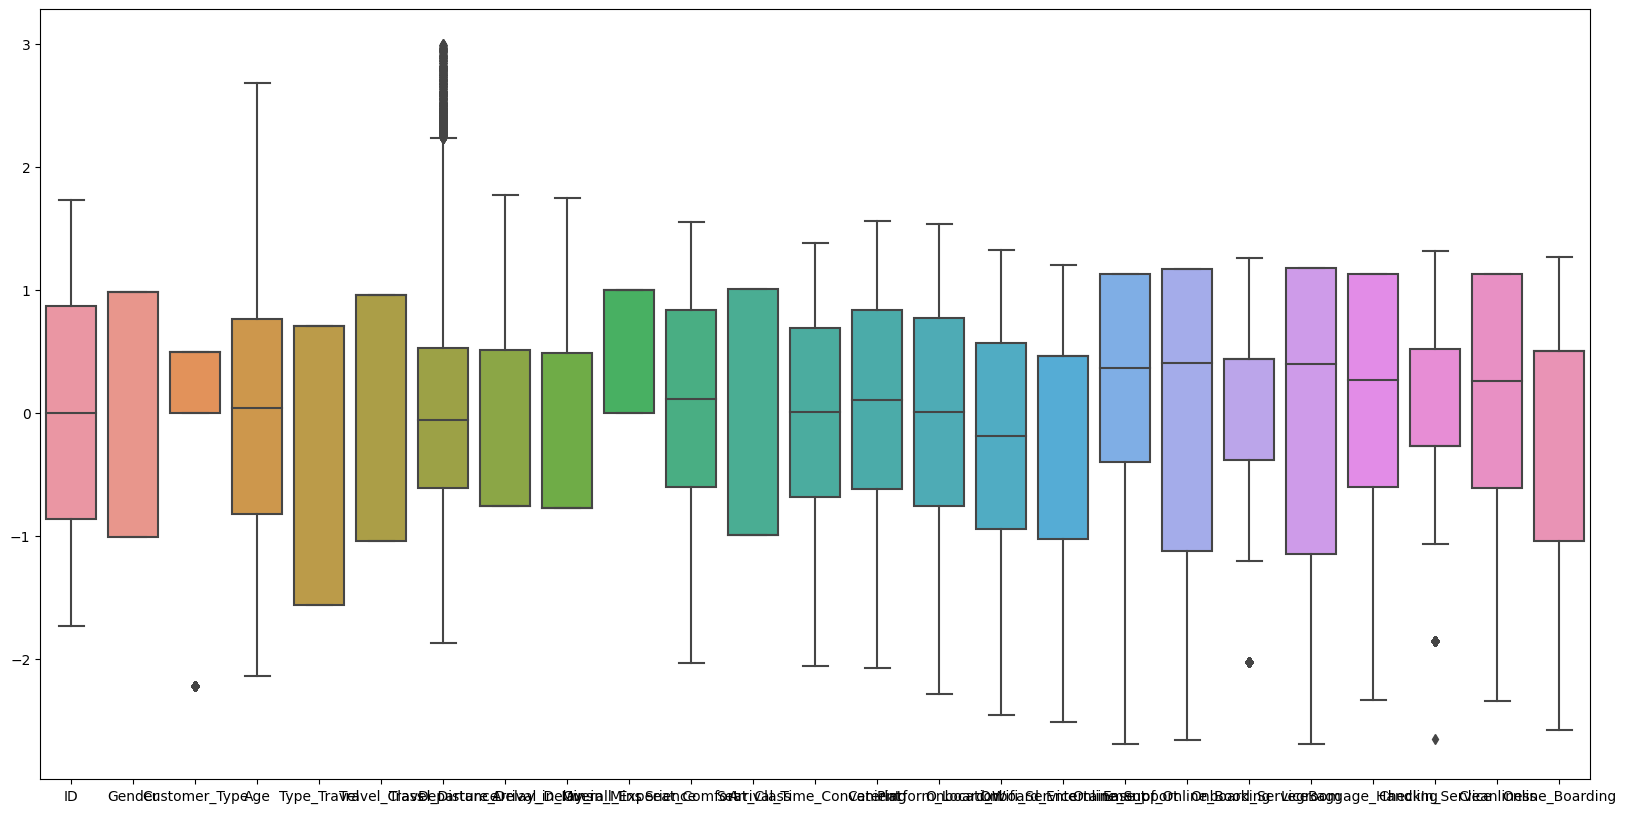

In [32]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = data_clean)
plt.show()

c:\Users\User\Documents\GitHub\train experience\venv\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


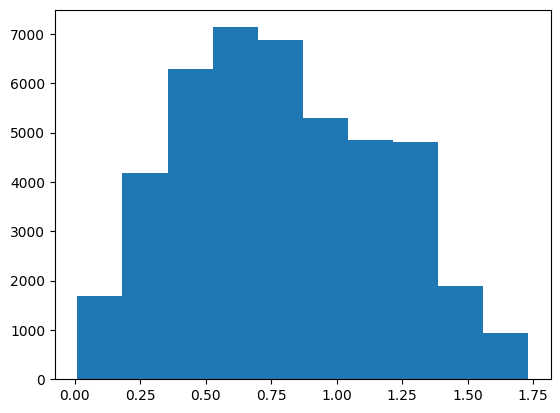

In [33]:
plt.hist(np.sqrt(data_clean['Travel_Distance']))
plt.show()

## Model Building

We will begin modeling testing different models and hyper parameters using Cross Validation

In [34]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [35]:
y = data_clean['Overall_Experience']
X = data_clean.drop('Overall_Experience',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#metric
from sklearn.metrics import confusion_matrix

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'criterion': 'gini', 'max_depth': 12}


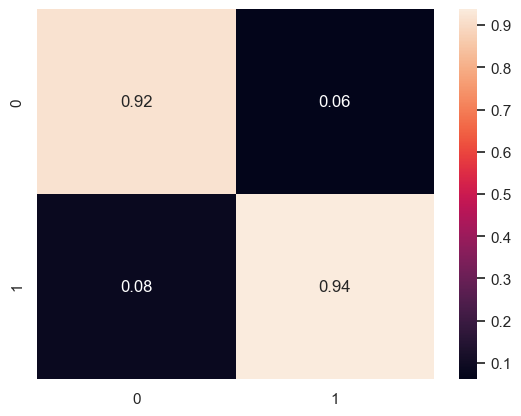

In [37]:
# Decision Tree classifier
parameters = {
    'max_depth' : [4,6,8,12],
    'criterion' : ['gini', 'entropy']
}
CVdt = GridSearchCV(DecisionTreeClassifier(), parameters,cv = 10,scoring = 'accuracy', n_jobs=-1, verbose = 1).fit(X_train,y_train)
print(CVdt.best_params_)

best_dt = DecisionTreeClassifier(criterion= 'gini', max_depth = 12).fit(X_train,y_train)
y_pred = best_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/sum(cm), annot=True, fmt='0.2f')
plt.show()

In [47]:
viz = dtreeviz(best_dt, 
               X_train,
               y_train,
               target_name='Overall_Experience',
               feature_names=X_train.columns,
               class_names=["0","1"])

c:\Users\User\Documents\GitHub\train experience\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [48]:
import streamlit as st
st.image(viz._repr_svg_(), use_column_width=True)
viz.view()

In [40]:
from joblib import dump, load
dump(best_dt, 'best_dt.joblib') 

['best_dt.joblib']

In [41]:
best_dt = load('best_dt.joblib') 
y_pred = best_dt.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [46]:
X_train.columns

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')